# FAF10 KF6 - Gamma lab - Data Analysis 

## Table of Content
    

* [Co-60 source](#co60)
    * [Calculating peak cenroid and FWHM](#import)
    * [Calibrating NaI(Tl) and HPGe detectors](#import)
    
    
* [Na-22 source](#na22)
    * [Compton continuum discussion](#import)
    * [Calculating ratio of 1273keV $\gamma$-ray and annihilation photons ](#import)
    
    
* [Cs-137 source](#cs137)
    * [Internal conversion coefficient](#import)


* [Cf-252 source](#cf252)
    * [Deuteron binding energy](#import)
    
    
* [FWHM as a function of gamma-ray energy](#fwhm)


* [Idetifying peaks from the background radiation](#background)

    

    








## Importing python packages <a name="import"></a>

Inserting parent directory to the path such that the analysis code in `fithelpers.py`, `histhelpers.py` and `MCA.py` can be found by `python`.

In [1]:
# Packages to help importing files 
import sys, os
sys.path.append('../')

# Package that supports working with large arrays
import numpy as np  

# Package for plotting 
import matplotlib   # choose a backend for web applications; remove for stand-alone applications:
matplotlib.use('Agg') # enable interactive notebook plots (alternative: use 'inline' instead of 'notebook'/'widget' for static images)
%matplotlib notebook

# The following line is the ONLY one needed in stand-alone applications!
import matplotlib.pyplot as plt

# Function that fits a curve to data 
from scipy.optimize import curve_fit

# Package to create interactive plots 
from ipywidgets import interact, interactive, fixed, widgets, Button, Layout


%load_ext autoreload
%autoreload 2

# Custom pakages prepared for you to use when analyzing experimental data from labs 
import fithelpers, histhelpers, MCA, fittingFunctions

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

----------------------------------------------------------------------------------------------------------

# Cs-137 and Co-60 spectra

Load spectra measured by NaI(Tl) detector: 

In [3]:
Cs137 = MCA.load_spectrum("resources/NaI/Cs-137.Spe")
Co60 = MCA.load_spectrum("resources/NaI/Co-60.Spe")

## Plotting Cs-137 spectrum

<IPython.core.display.Javascript object>


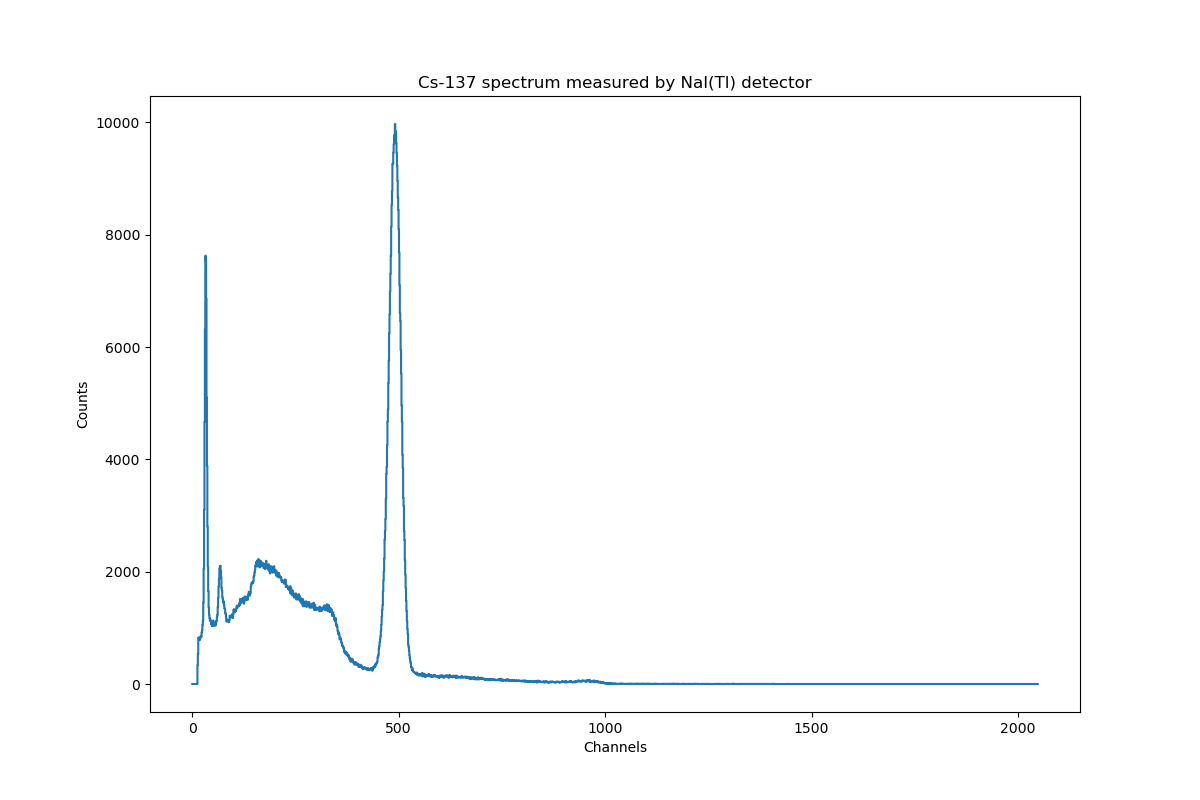

Text(0, 0.5, 'Counts')

In [4]:
plt.figure(figsize=(12, 8))
# with the data read in with the first routine
plt.step(Cs137.bin_centers, Cs137.y, where='mid', label='step')

plt.title("Cs-137 spectrum measured by NaI(Tl) detector") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("test_spectrum.png") #This is how you save the figure


## Could be useful to see this in log scale..?
# plt.yscale('log')
# plt.ylim(ymin=1)

## Plotting Co-60 spectrum

<IPython.core.display.Javascript object>


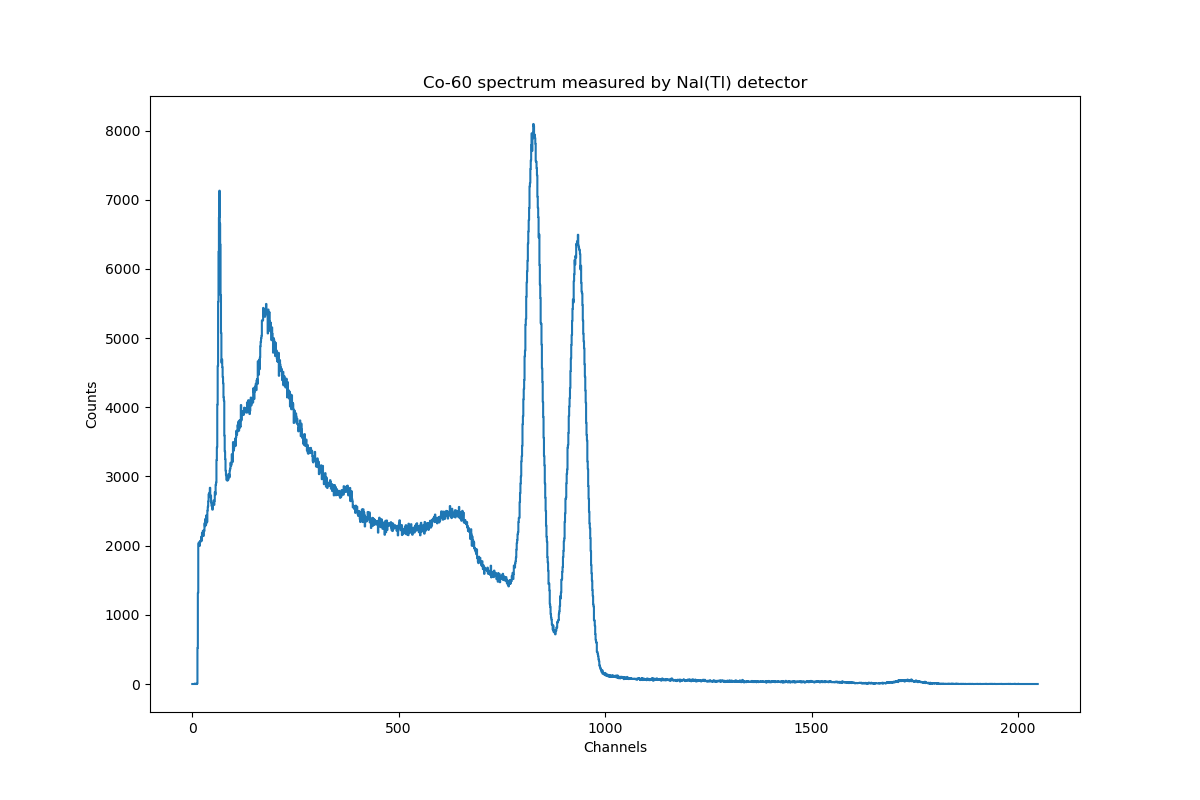

Text(0, 0.5, 'Counts')

In [5]:
plt.figure(figsize=(12, 8))
# with the data read in with the first routine
plt.step(Co60.bin_centers, Co60.y, where='mid', label='step')

plt.title("Co-60 spectrum measured by NaI(Tl) detector") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("test_spectrum.png") #This is how you save the figure


## Could be useful to see this in log scale..?
# plt.yscale('log')
# plt.ylim(ymin=1)

Think about following question: 
- Where are the full energy peaks on the spectra and what do they represent?
- How can we calibrate our detectors? 

### Fitting a Gaussian 

<IPython.core.display.Javascript object>


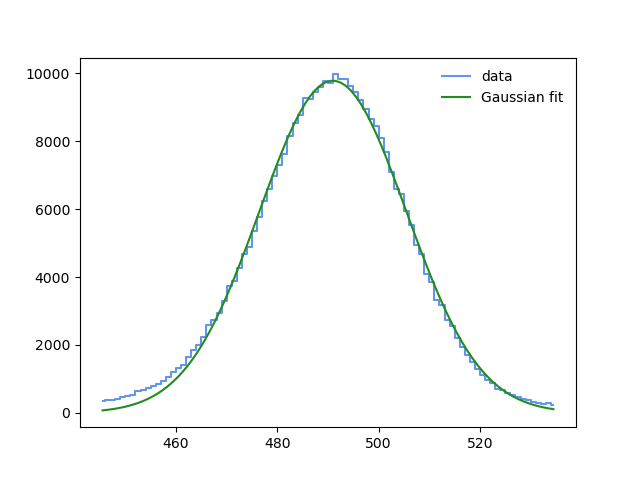

Estimates of (A mu sigma) = ( 9785.902417850213 490.9612331969752 14.498215648498935 )

Covariance matrix = 
 [[ 1.81414786e+03 -4.48875788e-04 -1.79460968e+00]
 [-4.48875788e-04  5.30720438e-03  1.49598486e-06]
 [-1.79460968e+00  1.49598486e-06  5.31890252e-03]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 1814.1478649470275 0.00530720438020925 0.005318902516641476 ]



In [6]:
##### Your initial guess here:

mu_guess = 491 # a guess for position of peak centroid
n = 45          # number of points on each side to include in fit

Cs137_peak = fittingFunctions.perform_Gaussian_fit(Cs137.bin_centers, Cs137.y, mu_guess, n)

Here is the code to fit one peak of Co-60 source for NaI(Tl) detector: 

<IPython.core.display.Javascript object>


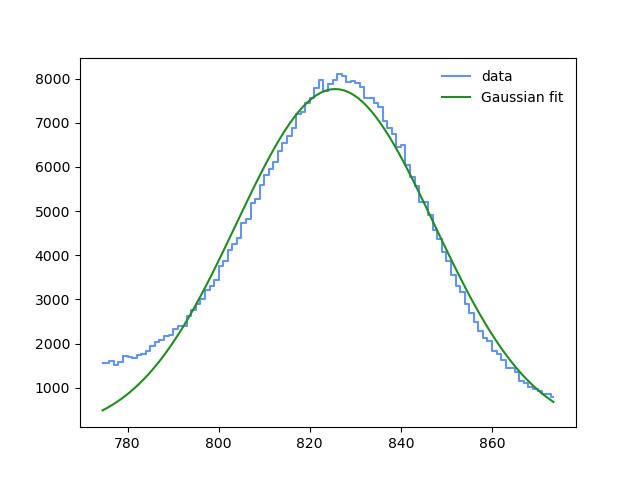

Estimates of (A mu sigma) = ( 7762.435806691211 825.576553128149 21.718804663426408 )

Covariance matrix = 
 [[ 5.43477173e+03 -7.90794160e-02 -1.06432147e+01]
 [-7.90794160e-02  5.64797506e-02  5.57790251e-04]
 [-1.06432147e+01  5.57790251e-04  6.03725777e-02]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 5434.771729913246 0.05647975062020553 0.06037257769610921 ]



In [7]:
##### Your initial guess here:

mu_guess = 825 # a guess for position of peak centroid
n = 50          # number of points on each side to include in fit

Co60_peak1 = fittingFunctions.perform_Gaussian_fit(Co60.bin_centers, Co60.y, mu_guess, n)

Now find a Gaussian fit for the second Co-60 peak for the NaI(Tl) detector: 

<IPython.core.display.Javascript object>


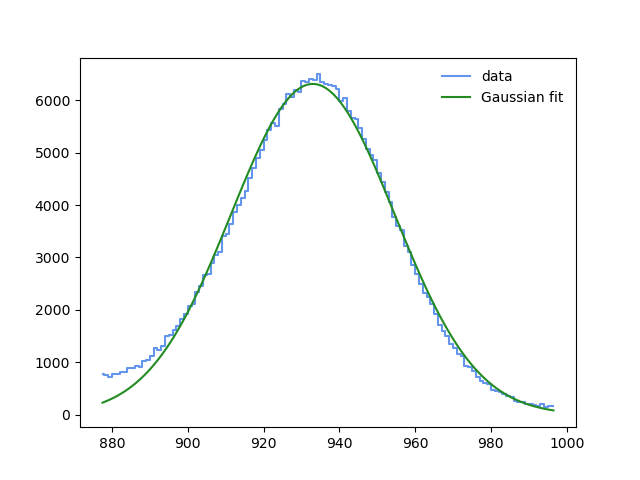

Estimates of (A mu sigma) = ( 6312.099620105031 932.9932084059174 21.565438761108307 )

Covariance matrix = 
 [[ 1.12706620e+03  8.99043051e-03 -2.59109972e+00]
 [ 8.99043051e-03  1.75116189e-02 -7.17399212e-05]
 [-2.59109972e+00 -7.17399212e-05  1.77402487e-02]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 1127.066201119185 0.0175116189404804 0.01774024869692429 ]



In [8]:
##### Your initial guess here:

mu_guess = 938 # a guess for position of peak centroid
n = 60          # number of points on each side to include in fit

Co60_peak2 = fittingFunctions.perform_Gaussian_fit(Co60.bin_centers, Co60.y, mu_guess, n)

##  Energy calibration of NaI(Tl) detector <a name="line"></a>

Recall that the energy calibration is the linear dependence between the ADC channel number and energies of full-energy peaks of a spectrum. It should be performed with a linear regression. Therefore, the idea behind it can be expressed as: 

\begin{equation*}
Energy = k \cdot channel + m  
\end{equation*}

where $Energy$ is characteristic $\gamma$-ray energy for a source and can be found from the KF6-RadionuclideTable-Gamma.pdf, $channel$ is a channel number that corresponds to a peak centroid of uncalibrated spectrum, $k$ and $m$ are calibration constants. 

From KF6-RadionuclideTable-Gamma.pdf or https://www.nndc.bnl.gov/nudat2/dec_searchi.jsp find energies of characteristic gamma rays for Cs-137 and Co-60 sources: 

In [9]:
Table_E_Cs137 = np.asarray([661.657])
Table_E_Co60 = np.asarray([1173.228, 1332.492])

In [10]:
Table_E = np.concatenate([Table_E_Cs137, Table_E_Co60]) 
Table_E

array([ 661.657, 1173.228, 1332.492])

Prepare values of channel numbers from the Gaussian fit you did in the previous step: 

In [11]:
mu_Cs137 = np.asarray([Cs137_peak.mu])
mu_Co60 = np.asarray([Co60_peak1.mu, Co60_peak2.mu])
mu_calibration = np.concatenate([mu_Cs137, mu_Co60]) 
mu_calibration

array([490.9612332 , 825.57655313, 932.99320841])

Find calibration constants for NaI(Tl) detector: 

Estimates of (k m) = ( 1.520290481310217 -84.18785290063546 )



<IPython.core.display.Javascript object>


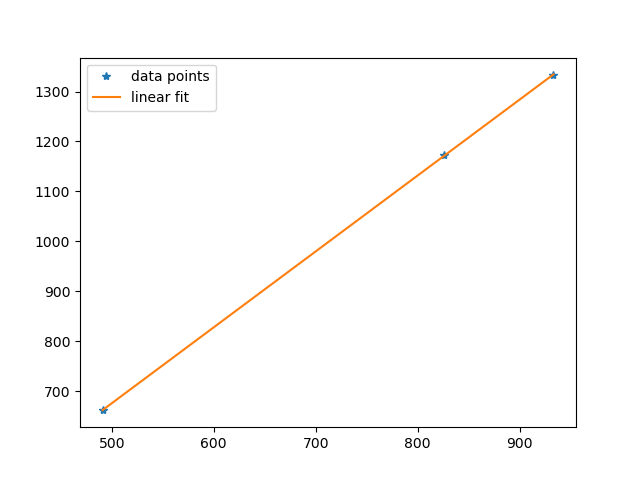

In [12]:
# Define the linear function which you want to fit.
def LineFunc(x, k, m):
    return k*x+m

# As for the Gaussian fit the function curve_fit needs a guess for the parameters to be estimated.
guess = [2, 1]

# Perform the fit
estimates_NaI, covar_matrix = curve_fit(LineFunc,
                                    mu_calibration,
                                    Table_E,
                                    p0 = guess)

k = estimates_NaI[0]
m = estimates_NaI[1]

print("Estimates of (k m) = (", k, m, ")\n")

# plot the result
plt.figure()
plt.plot(mu_calibration, Table_E,linestyle="", marker="*", label='data points')
plt.plot(mu_calibration, LineFunc(mu_calibration, estimates_NaI[0], estimates_NaI[1]), label='linear fit')
plt.legend(loc='upper left')
plt.show()



## Plot calibrated spectra 

In [18]:
Co60.calibrate(k,m)
Cs137.calibrate(k,m)

Present plots of calibrated spectra for Co-60 and Cs-137 for NaI(Tl) detector. Do not forget to add proper title, x and y axis labels to the plot. 

<IPython.core.display.Javascript object>


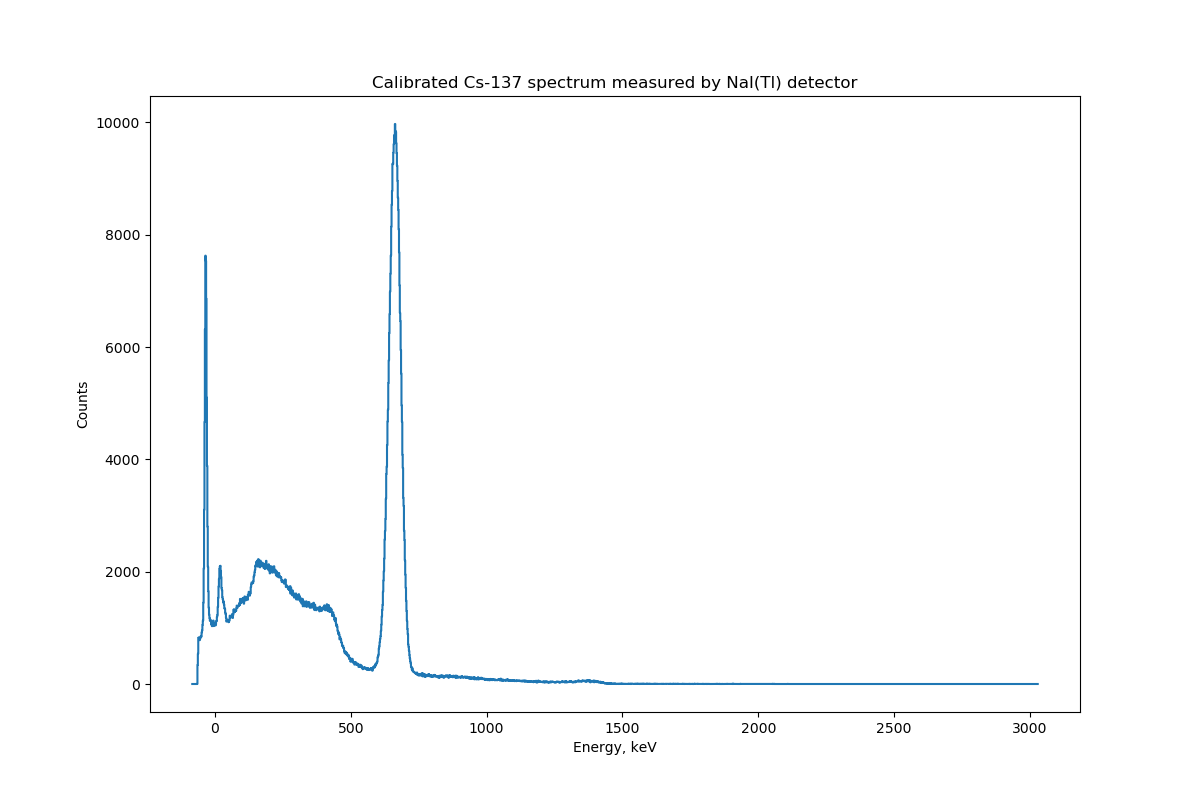

Text(0, 0.5, 'Counts')

In [20]:
plt.figure(figsize=(12, 8))
# with the data read in with the first routine
plt.step(Cs137.energy, Cs137.y, where='mid', label='step')

plt.title("Calibrated Cs-137 spectrum measured by NaI(Tl) detector") # set title of the plot
plt.xlabel("Energy, keV")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("th232_spectrum.png") #This is how you save the figure

<IPython.core.display.Javascript object>


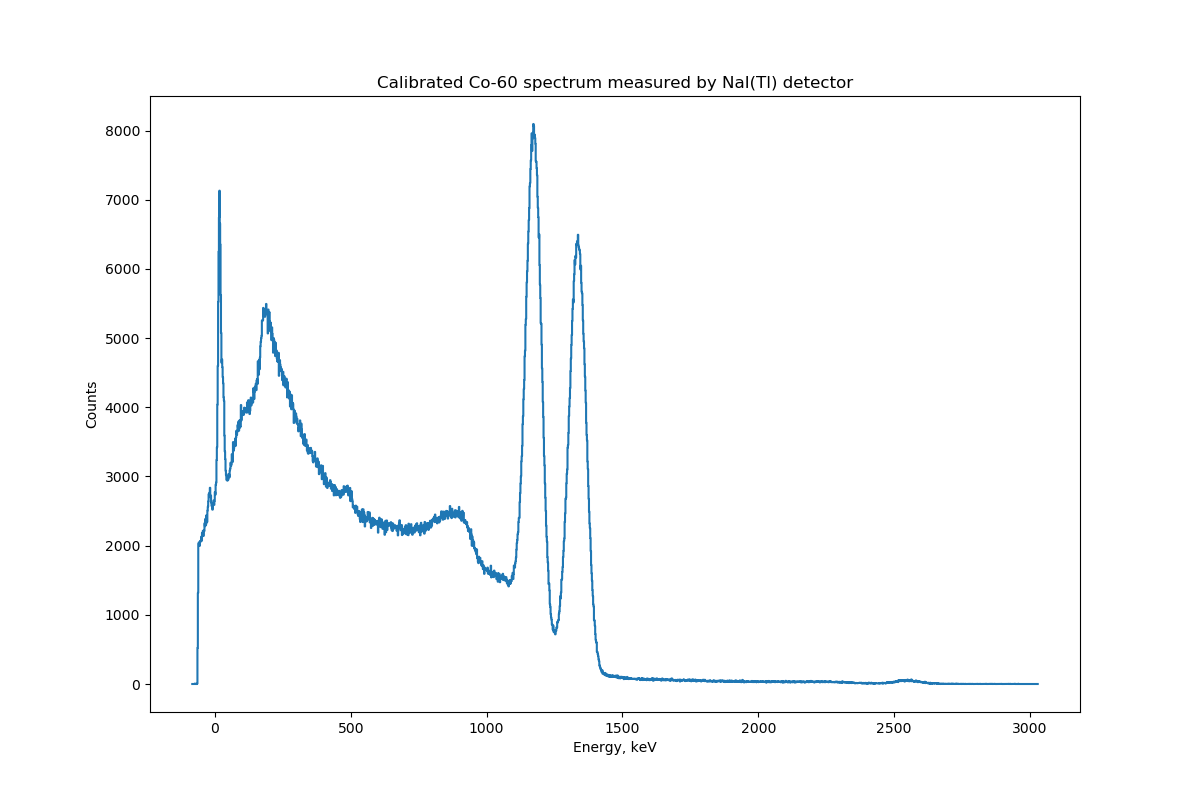

Text(0, 0.5, 'Counts')

In [21]:
plt.figure(figsize=(12, 8))
# with the data read in with the first routine
plt.step(Co60.energy, Co60.y, where='mid', label='step')

plt.title("Calibrated Co-60 spectrum measured by NaI(Tl) detector") # set title of the plot
plt.xlabel("Energy, keV")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("th232_spectrum.png") #This is how you save the figure


----------------------------------------------------------------------------------------------------------

# Thorium Salt 

Load measured spectrum:

In [13]:
Th232 = MCA.load_spectrum("resources/NaI/Th-232.Spe")

Calibrate your spectrum:

In [14]:
Th232.calibrate(k, m)
Th232.energy

array([ -83.42770766,  -81.90741718,  -80.3871267 , ..., 3025.56632662,
       3027.0866171 , 3028.60690758])

Plot calibrated spectrum:

<IPython.core.display.Javascript object>


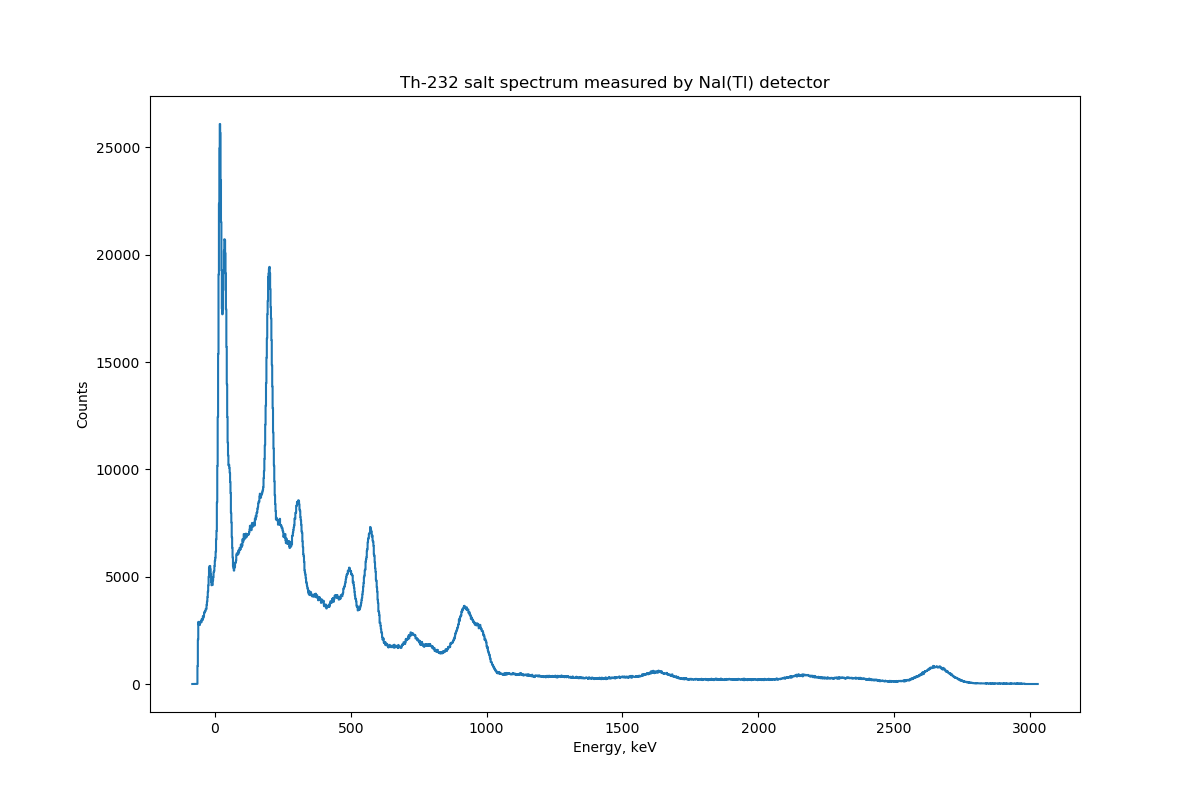

Text(0, 0.5, 'Counts')

In [15]:
plt.figure(figsize=(12, 8))
# with the data read in with the first routine
plt.step(Th232.energy, Th232.y, where='mid', label='step')

plt.title("Th-232 salt spectrum measured by NaI(Tl) detector") # set title of the plot
plt.xlabel("Energy, keV")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("th232_spectrum.png") #This is how you save the figure


Answer following questions: 
    * What is different about this spectrum in comparison to for example Cs-137?
    * Try to identify pair production in the spectrum. 

----------------------------------------------------------------------------------------------------------

# Na-22 source <a name="na22"></a>

Determine the ratio between the emitted 1273 keV $\gamma$ rays and the photons emitted from the annihilation of the $\beta^+$ decay of $^{22}$Na. Do this from the measured peak intensities of the NaI(Tl) scintillator spectrum. Correct the obtained values for efficiency.

In [23]:
Na22 = MCA.load_spectrum("resources/NaI/Na-22.Spe")

Plot the spectrum:

<IPython.core.display.Javascript object>


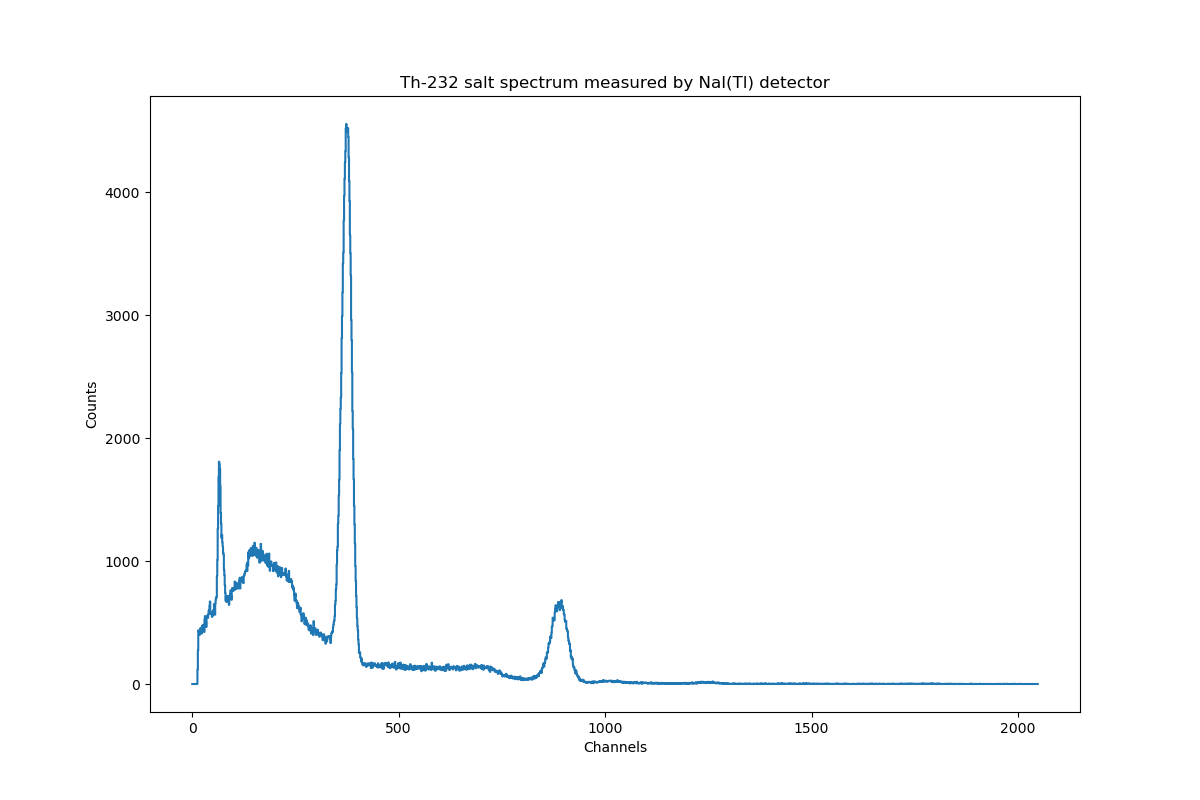

Text(0, 0.5, 'Counts')

In [27]:
plt.figure(figsize=(12, 8))
# with the data read in with the first routine
plt.step(Na22.bin_centers, Na22.y, where='mid', label='step')

plt.title("Th-232 salt spectrum measured by NaI(Tl) detector") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("th232_spectrum.png") #This is how you save the figure

<IPython.core.display.Javascript object>


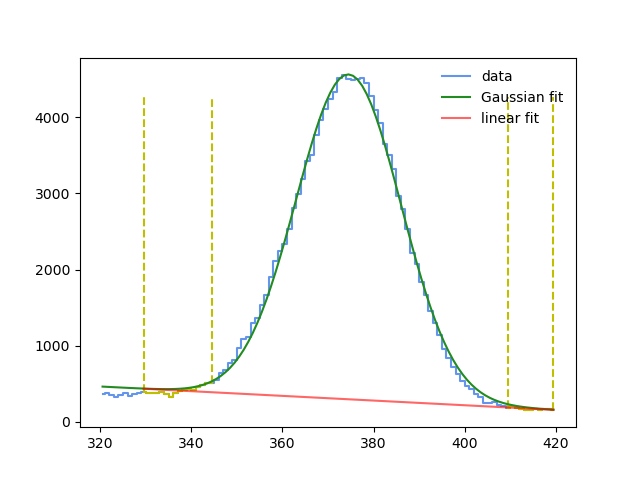

Estimates of (A mu sigma) = ( 4267.1695702872685 374.52663349047384 11.526774928186315 )

Covariance matrix = 
 [[ 3.74310194e+02 -6.54055956e-07 -6.74078147e-01]
 [-6.54055956e-07  3.64171568e-03  4.76386771e-09]
 [-6.74078147e-01  4.76386771e-09  3.64173672e-03]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 374.3101936663441 0.0036417156786353543 0.0036417367232091224 ]

Area of the peak:  123292.78101988364


In [41]:
##### Your initial guess here:
mu_guess = 371 # a guess for position of peak centroid
n = 50          # number of points on each side to include in fit
left_selection = [330, 345]
right_selection = [410, 420]

Na22_peak1 = fittingFunctions.perform_Gaussian_fit(Na22.bin_centers, Na22.y, mu_guess, n, left_selection, right_selection)
print("Area of the peak: ", Na22_peak1.area())

<IPython.core.display.Javascript object>


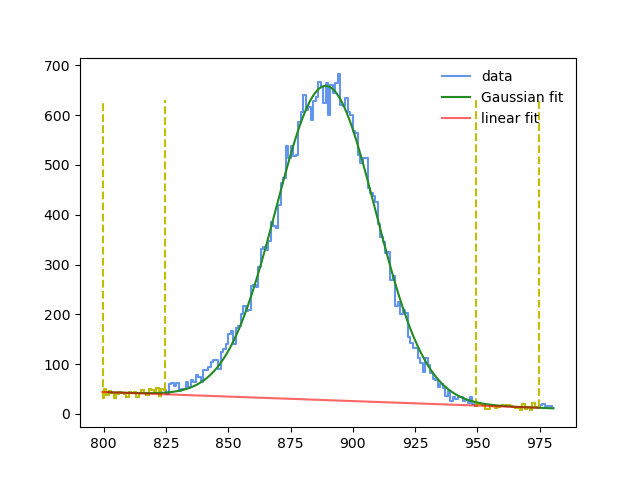

Estimates of (A mu sigma) = ( 631.3258839892866 889.184760124713 19.961507818025957 )

Covariance matrix = 
 [[ 1.00672534e+01  1.47091593e-07 -2.12207065e-01]
 [ 1.47091593e-07  1.34192979e-02 -4.85988965e-09]
 [-2.12207065e-01 -4.85988965e-09  1.34193006e-02]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 10.06725343470606 0.013419297886736008 0.013419300649199864 ]

Area of the peak:  31589.072374814234


In [40]:
##### Your initial guess here:
mu_guess = 892 # a guess for position of peak centroid
n = 90          # number of points on each side to include in fit
left_selection = [800, 825]
right_selection = [950, 975]

Na22_peak2 = fittingFunctions.perform_Gaussian_fit(Na22.bin_centers, Na22.y, mu_guess, n, left_selection, right_selection)
print("Area of the peak: ", Na22_peak2.area())

Find ratio of two peaks:

In [44]:
Ratio = Na22_peak1.area()/Na22_peak2.area()
print(Ratio)

3.9030199923877533


Comment on obtained value? Is is as expected? 

Correct the obtained values for efficiency ($\varepsilon_{eff}$) and peak-to-total ratio ($\varepsilon_{P/T}$). See ``KF6-Attachments.pdf`` for efficiency values and note that the cylindrical NaI-scintillator has dimensions 7.62x7.62~cm$^2$ (diameter and length). Compare the result to the expected value.

----------------------------------------------------------------------------------------------------------

# Cs-137 source <a name="cs137"></a>

## Internal conversion coefficient $\alpha$ 

Determine the internal conversion coefficient ($\alpha$) for $^{137}$Ba from the measured peak intensities of the $^{137}$Cs source, i.e. the area of the peaks, of the HPGe semiconductor spectrum. Do not forget to correct for efficiency (use the following: $\varepsilon_{eff} \cdot \varepsilon_{P/T} = 0.9$ and 0.3 at x-ray energies and at 662 keV, respectively), the emission of Auger electrons (see Table T1 in the ``KF6-Attachments.pdf``) and the error analysis. Compare the obtained value with literature and discuss.

Internal conversion coefficient: 
\begin{equation*}
\alpha = \frac{\lambda_{IC}}{\lambda_\gamma} = \frac{I_{0}(x-rays)}{I_0(662keV)}
\end{equation*}

where $I_{0}(x-rays)$ and $I_0(662keV)$ are areas of the peaks  <br> 
<br> 

In [45]:
Cs137_gain = MCA.load_spectrum("resources/Germanium/Cs-137.Spe")

Plot the spectrum: 

<IPython.core.display.Javascript object>


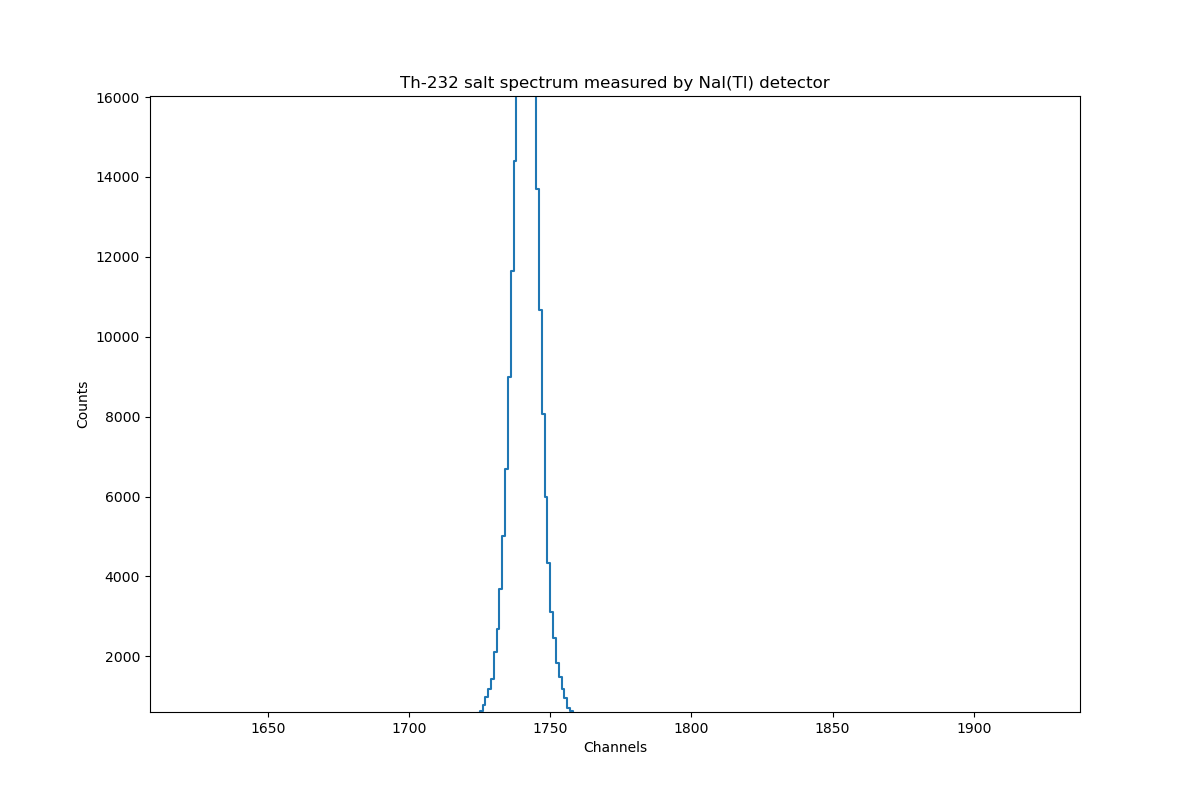

Text(0, 0.5, 'Counts')

In [46]:
plt.figure(figsize=(12, 8))
# with the data read in with the first routine
plt.step(Cs137_gain.bin_centers, Cs137_gain.y, where='mid', label='step')

plt.title("Th-232 salt spectrum measured by NaI(Tl) detector") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("th232_spectrum.png") #This is how you save the figure

Find intensities of x- rays peaks and 662 keV peak: 

<IPython.core.display.Javascript object>


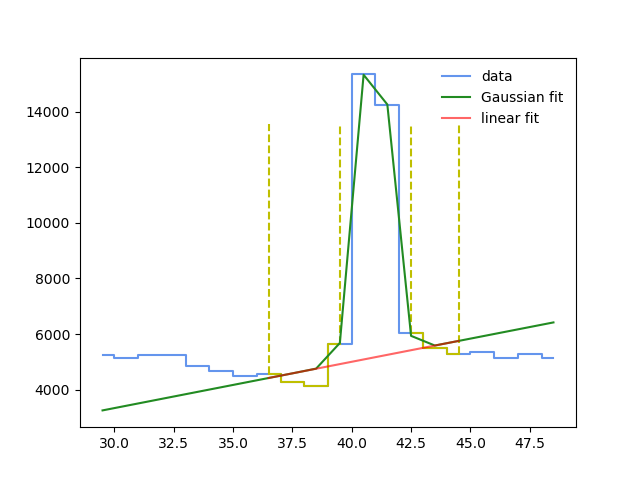

Estimates of (A mu sigma) = ( 13557.473488975986 40.95289868243806 0.6052216287445843 )

Covariance matrix = 
 [[ 4.77729529e+06  3.25125448e+01 -2.39329691e+02]
 [ 3.25125448e+01  3.17691270e-03 -1.94122880e-03]
 [-2.39329691e+02 -1.94122880e-03  1.52589385e-02]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 4777295.290694815 0.003176912704921832 0.015258938470955824 ]

Area of the peak:  20567.577290637306


In [51]:
##### Your initial guess here:
mu_guess = 40 # a guess for position of peak centroid
n = 10          # number of points on each side to include in fit
left_selection = [37, 40]
right_selection = [43, 45]

Cs137_gain_xray1 = fittingFunctions.perform_Gaussian_fit(Cs137_gain.bin_centers, Cs137_gain.y, mu_guess, n, left_selection, right_selection)
print("Area of the peak: ", Cs137_gain_xray1.area())

<IPython.core.display.Javascript object>


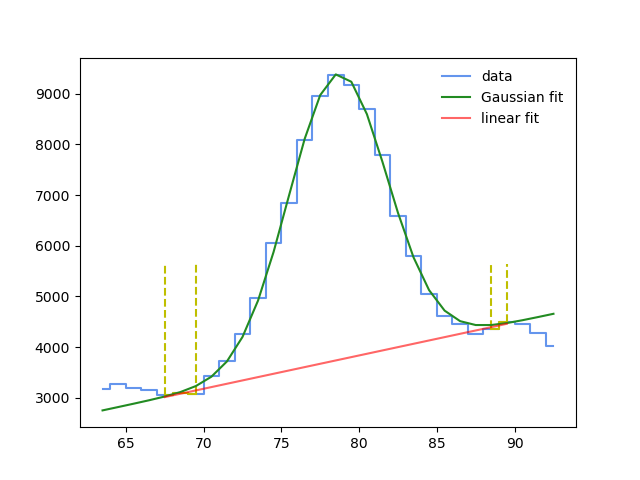

Estimates of (A mu sigma) = ( 5646.99802910124 78.6215807912338 3.152830936438429 )

Covariance matrix = 
 [[ 1.19621177e+04  1.63617520e-06 -4.45246304e+00]
 [ 1.63617520e-06  4.97180185e-03 -9.06072684e-10]
 [-4.45246304e+00 -9.06072684e-10  4.97180200e-03]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 11962.117690303307 0.004971801847083527 0.004971802000687201 ]

Area of the peak:  44628.08521132944


In [56]:
##### Your initial guess here:
mu_guess = 79 # a guess for position of peak centroid
n = 15          # number of points on each side to include in fit
left_selection = [68, 70]
right_selection = [89, 90]

Cs137_gain_xray2 = fittingFunctions.perform_Gaussian_fit(Cs137_gain.bin_centers, Cs137_gain.y, mu_guess, n, left_selection, right_selection)
print("Area of the peak: ", Cs137_gain_xray2.area())

<IPython.core.display.Javascript object>


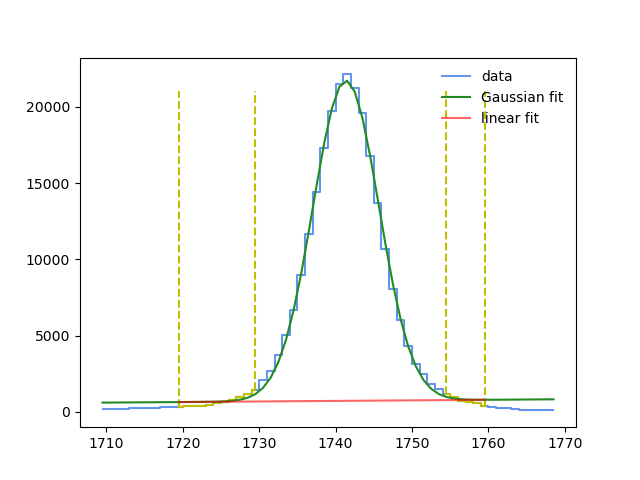

Estimates of (A mu sigma) = ( 21020.38005415673 1741.349067196764 4.317132859413258 )

Covariance matrix = 
 [[ 2.80774522e+04  2.30994116e-05 -3.84433073e+00]
 [ 2.30994116e-05  1.57908333e-03 -4.74732357e-09]
 [-3.84433073e+00 -4.74732357e-09  1.57908334e-03]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 28077.452248080863 0.0015790833348541492 0.0015790833407733722 ]

Area of the peak:  227470.93478746043


In [60]:
##### Your initial guess here:
mu_guess = 1740 # a guess for position of peak centroid
n = 30          # number of points on each side to include in fit
left_selection = [1720, 1730]
right_selection = [1755, 1760]

Cs137_gain_peak = fittingFunctions.perform_Gaussian_fit(Cs137_gain.bin_centers, Cs137_gain.y, mu_guess, n, left_selection, right_selection)
print("Area of the peak: ", Cs137_gain_peak.area())

In [64]:
coeff = (Cs137_gain_xray1.area() + Cs137_gain_xray2.area())/(0.9*Cs137_gain_peak.area())
print("Calculated value of Ba-137 internal conversion:", coeff)

Calculated value of Ba-137 internal conversion: 0.31845661983088036


Correct your result for efficiency:

Compare your result with theoretical value.

----------------------------------------------------------------------------------------------------------

# Discussion

 - What is the full energy peak and what does it represent? <br>
  <br>
 - What are the Compton continuum, Compton edge and the backscatter peak and why do they appear? <br>
  <br>
 - In which spectrum can one observe single and double escape peaks, why and what they are? <br>
  <br>
 - How can we know that a source emits $\beta^+$ particles? <br>
  <br>
 - X-rays can be observed. From what process do they stem and from what element are they emitted? 

----------------------------------------------------------------------------------------------------------

# Conclusions <a name="background"></a>